In [1]:
import pandas as pd # manipulação de dados em formato de dataframe
import numpy as np # operações matemáticas
import seaborn as sns # visualização gráfica
import matplotlib.pyplot as plt # visualização gráfica
import plotly.graph_objects as go # gráficos 3D
from scipy.stats import pearsonr # correlações de Pearson
import statsmodels.api as sm # estimação de modelos
from statsmodels.iolib.summary2 import summary_col # comparação entre modelos
from sklearn.preprocessing import LabelEncoder # transformação de dados
import pingouin as pg # outro modo para obtenção de matrizes de correlações
import emojis # inserção de emojis em gráficos
from statstests.process import stepwise # procedimento Stepwise
from statstests.tests import shapiro_francia # teste de Shapiro-Francia
from scipy.stats import boxcox # transformação de Box-Cox
from scipy.stats import norm # para plotagem da curva normal
from scipy import stats # utilizado na definição da função 'breusch_pagan_test'

In [3]:
# Carregando o dataset
df_saeb_rend = pd.read_csv('data/saeb_rend.csv', delimiter=',')

# Características das variáveis do dataset
df_saeb_rend.info()

# Estatísticas univariadas
df_saeb_rend.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43607 entries, 0 to 43606
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   uf          43607 non-null  object 
 1   municipio   43607 non-null  object 
 2   codigo      43607 non-null  int64  
 3   escola      43607 non-null  object 
 4   rede        43607 non-null  object 
 5   saeb        25538 non-null  float64
 6   rendimento  37324 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 2.3+ MB


,codigo,saeb,rendimento
count,4.360700e+04,25538.000000,37324.000000
mean,3.112734e+07,5.047511,0.856967
std,9.956731e+06,0.753718,0.110447
min,1.100026e+07,2.053000,0.247282
25%,2.316996e+07,4.554542,0.791561
50%,3.108142e+07,5.069500,0.878536
75%,3.590717e+07,5.551458,0.944761
max,5.306821e+07,8.588000,1.000000


In [4]:
# Tabela de frequências absolutas das variáveis 'uf' e rede'

df_saeb_rend['uf'].value_counts().sort_index()
df_saeb_rend['rede'].value_counts().sort_index()

rede
Estadual     20959
Federal         38
Municipal    22610
Name: count, dtype: int64

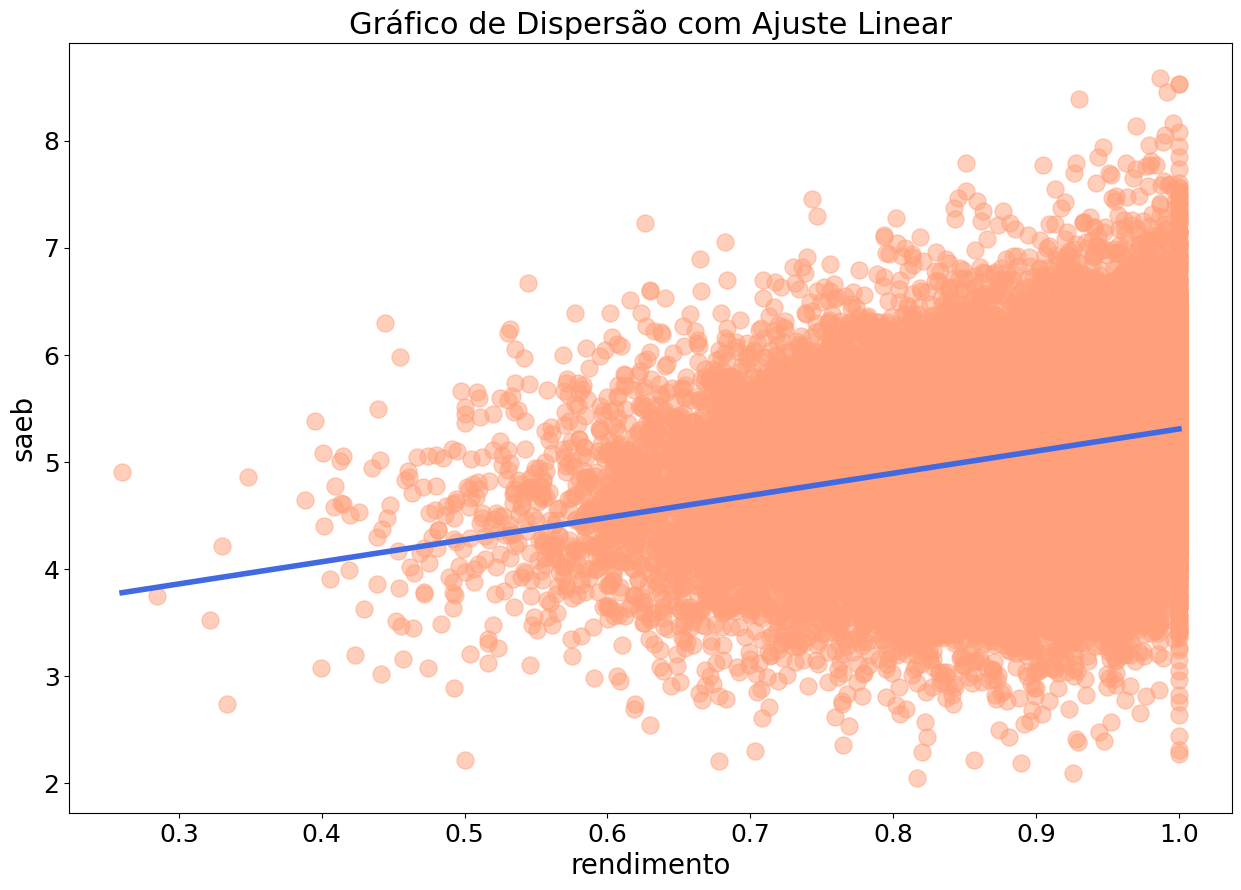

In [5]:
# Plotando a variável 'saeb' em função de 'rendimento', com fit linear
# Gráfico pela função 'regplot' do 'seaborn'

plt.figure(figsize=(15,10))
sns.regplot(x='rendimento', y='saeb', data=df_saeb_rend, marker='o',
            color='royalblue', ci=False,
            scatter_kws={'color':'lightsalmon', 'alpha':0.5, 's':150},
            line_kws={'linewidth': 4})
plt.title('Gráfico de Dispersão com Ajuste Linear', fontsize=22)
plt.xlabel('rendimento', fontsize=20)
plt.ylabel('saeb', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

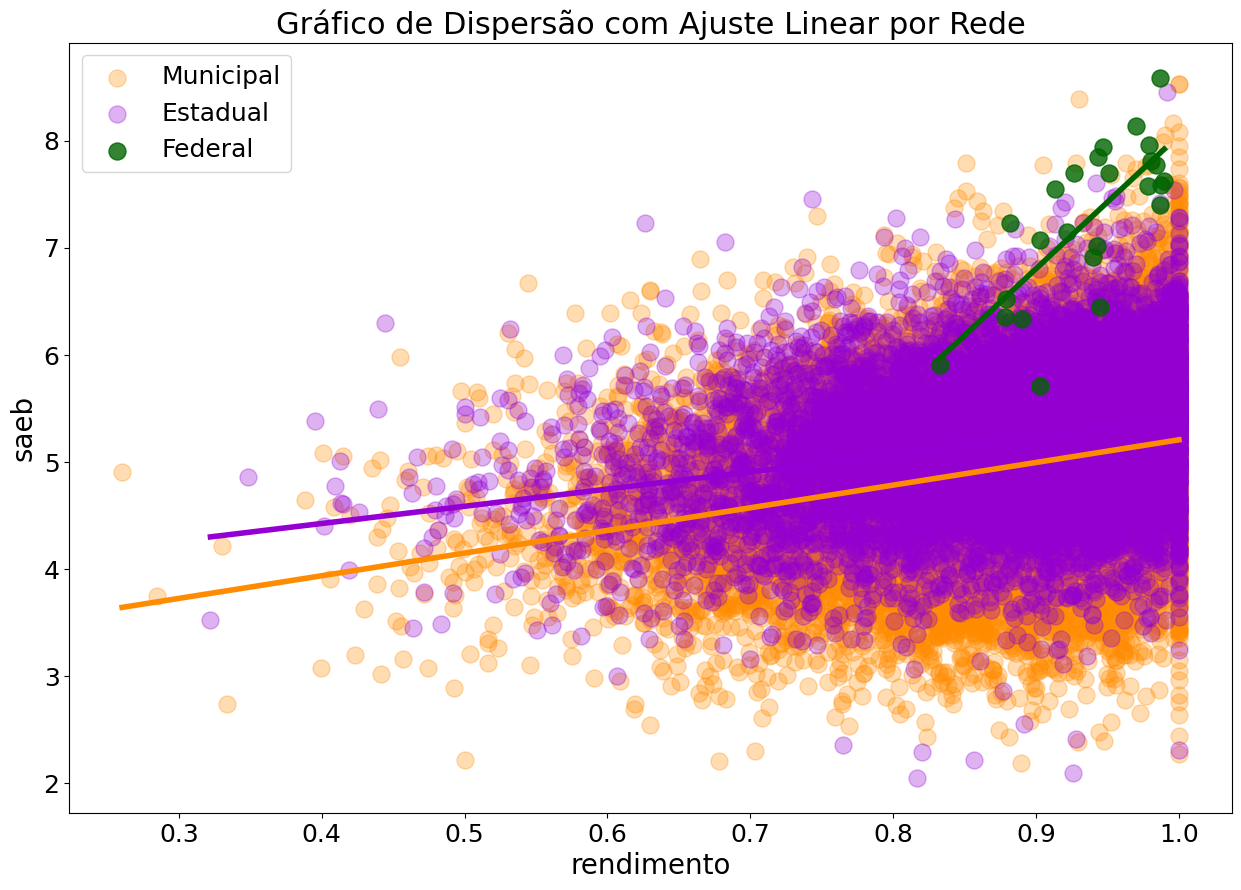

In [6]:
# Plotando a variável 'saeb' em função de 'rendimento', com destaque
# para a 'rede' escolar e linear fits -> Gráfico pela função 'regplot' do
# pacote 'seaborn'

# Definição de dataframes com subgrupos por 'rede'
df1 = df_saeb_rend[df_saeb_rend['rede'] == 'Municipal']
df2 = df_saeb_rend[df_saeb_rend['rede'] == 'Estadual']
df3 = df_saeb_rend[df_saeb_rend['rede'] == 'Federal']

# Gráfico propriamente dito
plt.figure(figsize=(15,10))
sns.regplot(x='rendimento', y='saeb', data=df1, marker='o', ci=False,
            scatter_kws={'color':'darkorange', 'alpha':0.3, 's':150},
            line_kws={'color':'darkorange', 'linewidth': 4}, label='Municipal')
sns.regplot(x='rendimento', y='saeb', data=df2, marker='o', ci=False,
            scatter_kws={'color':'darkviolet', 'alpha':0.3, 's':150},
            line_kws={'color':'darkviolet', 'linewidth': 4}, label='Estadual')
sns.regplot(x='rendimento', y='saeb', data=df3, marker='o', ci=False,
            scatter_kws={'color':'darkgreen', 'alpha':0.8, 's':150},
            line_kws={'color':'darkgreen', 'linewidth': 4}, label='Federal')
plt.title('Gráfico de Dispersão com Ajuste Linear por Rede', fontsize=22)
plt.xlabel('rendimento', fontsize=20)
plt.ylabel('saeb', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=18)
plt.show()

In [7]:
# Estimação do modelo de regressão e diagnóstico de heterocedasticidade

# Estimando o modelo
modelo_saeb = sm.OLS.from_formula('saeb ~ rendimento', df_saeb_rend).fit()

# Parâmetros do 'modelo_saeb'
print(modelo_saeb.summary())

                            OLS Regression Results                            
Dep. Variable:                   saeb   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     2126.
Date:                Tue, 13 Aug 2024   Prob (F-statistic):               0.00
Time:                        20:35:56   Log-Likelihood:                -27984.
No. Observations:               25530   AIC:                         5.597e+04
Df Residuals:                   25528   BIC:                         5.599e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.2425      0.039     82.277      0.0

In [8]:
# Adicionando fitted values e resíduos do 'modelo_saeb' no
# dataset 'df_saeb_rend'

df_saeb_rend['fitted'] = modelo_saeb.fittedvalues
df_saeb_rend['residuos'] = modelo_saeb.resid
df_saeb_rend

,uf,municipio,codigo,escola,rede,saeb,rendimento,fitted,residuos
0,RO,Alta Floresta D'Oeste,11024666,EMEIEF BOA ESPERANCA,Municipal,5.331833,0.766092,4.825556,0.506278
1,RO,Alta Floresta D'Oeste,11024682,EEEF EURIDICE LOPES PEDROSO,Estadual,NaN,0.910890,NaN,NaN
2,RO,Alta Floresta D'Oeste,11024828,EMEIEF IZIDORO STEDILE,Municipal,5.432333,0.884658,5.070567,0.361767
3,RO,Alta Floresta D'Oeste,11024917,EMEIEF JOSE BASILIO DA GAMA,Municipal,NaN,NaN,NaN,NaN
4,RO,Alta Floresta D'Oeste,11024968,EEEFM JUSCELINO KUBITSCHEK DE OLIVEIRA,Estadual,5.568833,0.957629,5.221359,0.347474
...,...,...,...,...,...,...,...,...,...
43602,DF,Brasília,53068106,CEF 02 DO RIACHO FUNDO II,Estadual,5.458000,0.905575,5.113792,0.344208
43603,DF,Brasília,53068114,CEF 27 DE CEILANDIA,Estadual,4.895667,0.882728,5.066579,-0.170913
43604,DF,Brasília,53068122,CEF 28 DE CEILANDIA,Estadual,5.191667,0.841983,4.982381,0.209286
43605,DF,Brasília,53068149,CEF 32 DE CEILANDIA,Estadual,5.157667,0.766156,4.825688,0.331978


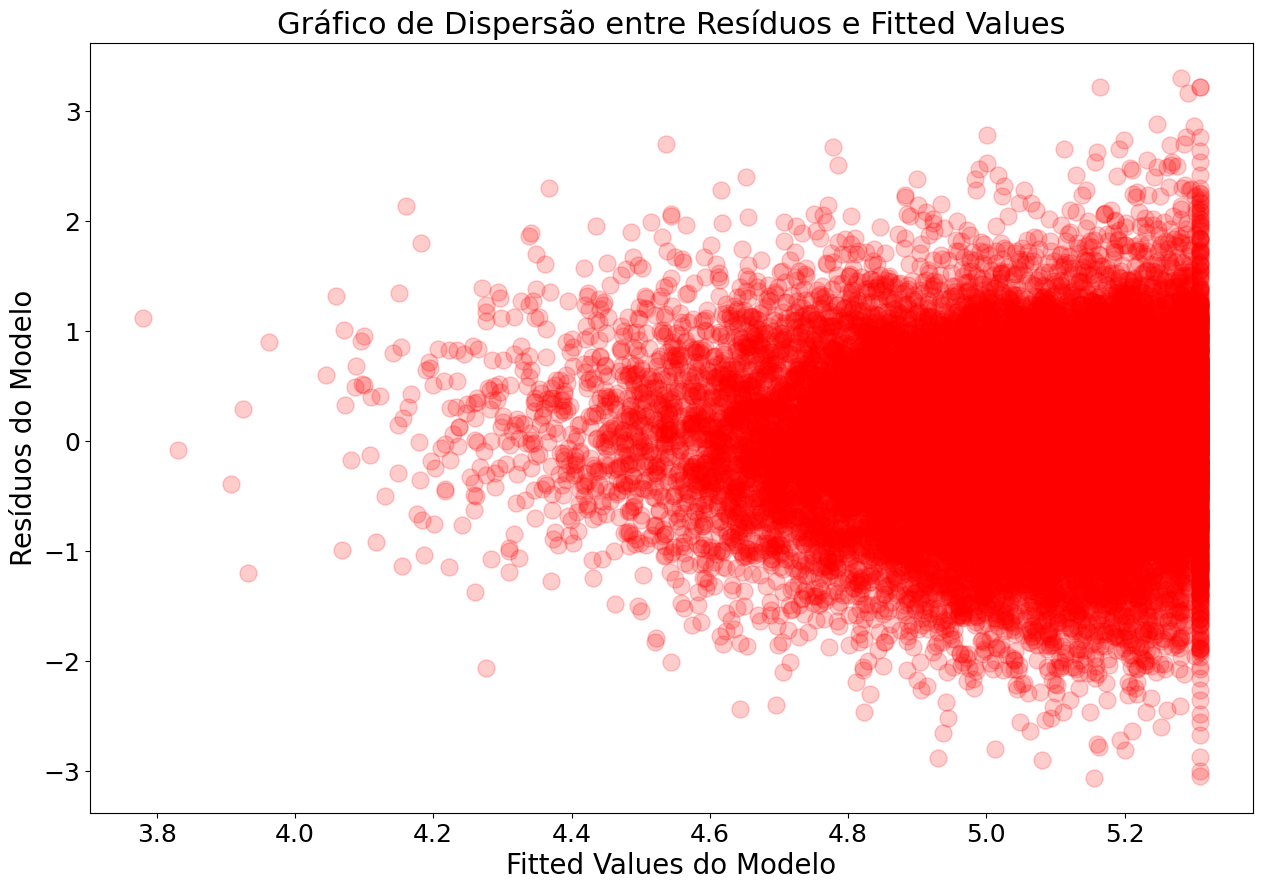

In [9]:
# Gráfico que relaciona resíduos e fitted values do 'modelo_saeb'

plt.figure(figsize=(15,10))
sns.regplot(x='fitted', y='residuos', data=df_saeb_rend,
            marker='o', fit_reg=False,
            scatter_kws={"color":'red', 'alpha':0.2, 's':150})
plt.title('Gráfico de Dispersão entre Resíduos e Fitted Values', fontsize=22)
plt.xlabel('Fitted Values do Modelo', fontsize=20)
plt.ylabel('Resíduos do Modelo', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

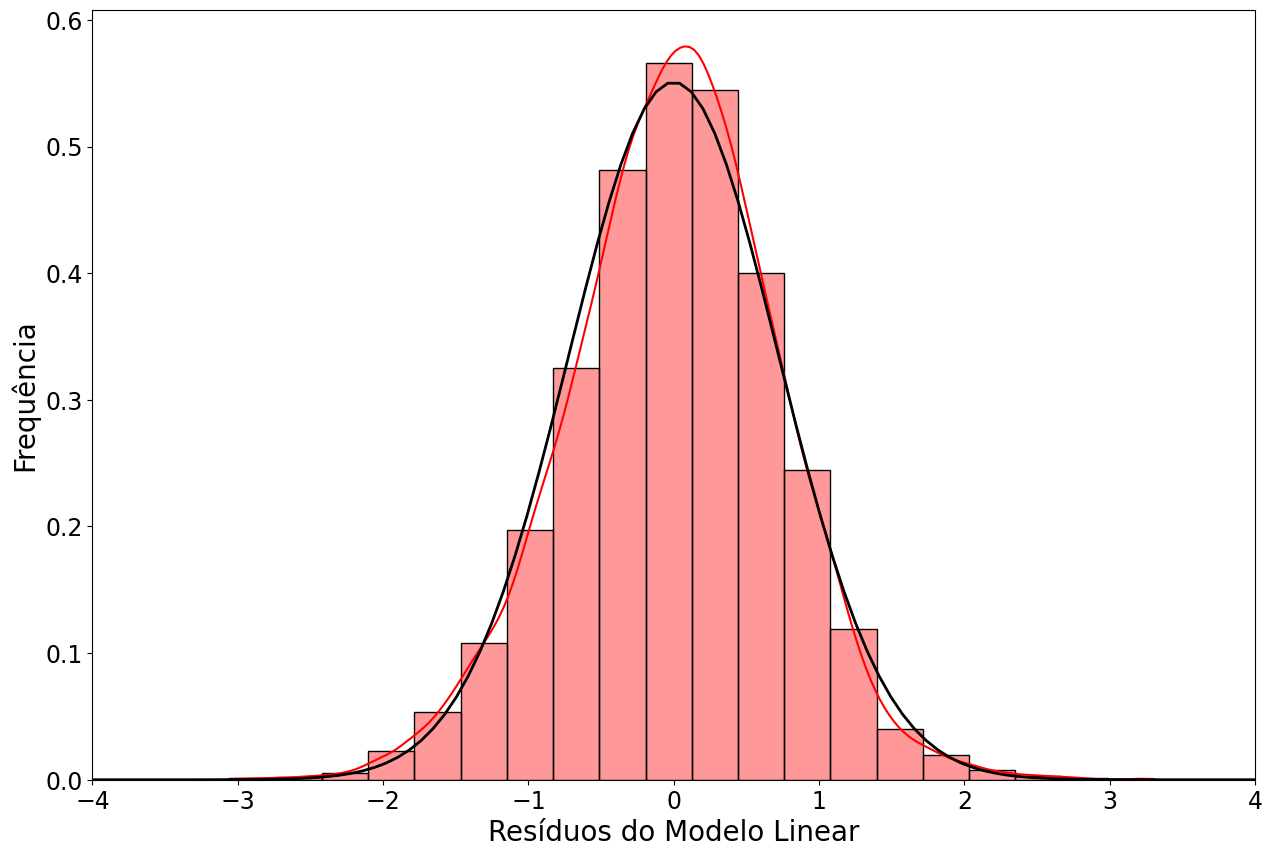

In [10]:
# Histograma dos resíduos do 'modelo_saeb' com curva normal teórica
# para comparação das distribuições
# Kernel density estimation (KDE) - forma não-paramétrica para estimação da
# função densidade de probabilidade de determinada variável

from scipy.stats import norm

# Calcula os valores de ajuste da distribuição normal
(mu, sigma) = norm.fit(modelo_saeb.resid)

# Gráfico propriamente dito
plt.figure(figsize=(15,10))
sns.histplot(modelo_saeb.resid, bins=20, kde=True, stat="density",
             color='red', alpha=0.4)
plt.xlim(-4, 4)
x = np.linspace(-4, 4, 100)
p = norm.pdf(x, mu, sigma)
plt.plot(x, p, 'k', linewidth=2)
plt.xlabel('Resíduos do Modelo Linear', fontsize=20)
plt.ylabel('Frequência', fontsize=20)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.show()

In [11]:
# Função para o teste de Breusch-Pagan para a elaboração de diagnóstico
# de heterocedasticidade

# Criação da função 'breusch_pagan_test'

def breusch_pagan_test(modelo):

    df = pd.DataFrame({'yhat':modelo.fittedvalues,
                       'resid':modelo.resid})
   
    df['up'] = (np.square(df.resid))/np.sum(((np.square(df.resid))/df.shape[0]))
   
    modelo_aux = sm.OLS.from_formula('up ~ yhat', df).fit()
   
    anova_table = sm.stats.anova_lm(modelo_aux, typ=2)
   
    anova_table['sum_sq'] = anova_table['sum_sq']/2
    
    chisq = anova_table['sum_sq'].iloc[0]
   
    p_value = stats.chi2.pdf(chisq, 1)*2
    
    print(f"chisq: {chisq}")
    
    print(f"p-value: {p_value}")
    
    return chisq, p_value

In [13]:
# Teste de Breusch-Pagan propriamente dito

breusch_pagan_test(modelo_saeb)
# Presença de heterocedasticidade -> omissão de variável(is) explicativa(s)
# relevante(s)

# H0 do teste: ausência de heterocedasticidade.
# H1 do teste: heterocedasticidade, ou seja, correlação entre resíduos e
# uma ou mais variáveis explicativas, o que indica omissão de variável relevante!

# Interpretação
teste_bp = breusch_pagan_test(modelo_saeb) # criação do objeto 'teste_bp'
chisq, p = teste_bp # definição dos elementos contidos no objeto 'teste_bp'
alpha = 0.05 # nível de significância
if p > alpha:
    print('Não se rejeita H0 - Ausência de Heterocedasticidade')
else:
	print('Rejeita-se H0 - Existência de Heterocedasticidade')

chisq: 16.72070032595354
p-value: 4.565190314938307e-05
chisq: 16.72070032595354
p-value: 4.565190314938307e-05
Rejeita-se H0 - Existência de Heterocedasticidade


In [14]:
# Procedimento n-1 dummies para as unidades federativas
    
# Dummização da variável 'uf'

df_saeb_rend_dummies = pd.get_dummies(df_saeb_rend, columns=['uf'],
                                      dtype=int,
                                      drop_first=True)

df_saeb_rend_dummies

,municipio,codigo,escola,rede,saeb,rendimento,fitted,residuos,uf_AL,uf_AM,...,uf_PR,uf_RJ,uf_RN,uf_RO,uf_RR,uf_RS,uf_SC,uf_SE,uf_SP,uf_TO
0,Alta Floresta D'Oeste,11024666,EMEIEF BOA ESPERANCA,Municipal,5.331833,0.766092,4.825556,0.506278,0,0,...,0,0,0,1,0,0,0,0,0,0
1,Alta Floresta D'Oeste,11024682,EEEF EURIDICE LOPES PEDROSO,Estadual,NaN,0.910890,NaN,NaN,0,0,...,0,0,0,1,0,0,0,0,0,0
2,Alta Floresta D'Oeste,11024828,EMEIEF IZIDORO STEDILE,Municipal,5.432333,0.884658,5.070567,0.361767,0,0,...,0,0,0,1,0,0,0,0,0,0
3,Alta Floresta D'Oeste,11024917,EMEIEF JOSE BASILIO DA GAMA,Municipal,NaN,NaN,NaN,NaN,0,0,...,0,0,0,1,0,0,0,0,0,0
4,Alta Floresta D'Oeste,11024968,EEEFM JUSCELINO KUBITSCHEK DE OLIVEIRA,Estadual,5.568833,0.957629,5.221359,0.347474,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43602,Brasília,53068106,CEF 02 DO RIACHO FUNDO II,Estadual,5.458000,0.905575,5.113792,0.344208,0,0,...,0,0,0,0,0,0,0,0,0,0
43603,Brasília,53068114,CEF 27 DE CEILANDIA,Estadual,4.895667,0.882728,5.066579,-0.170913,0,0,...,0,0,0,0,0,0,0,0,0,0
43604,Brasília,53068122,CEF 28 DE CEILANDIA,Estadual,5.191667,0.841983,4.982381,0.209286,0,0,...,0,0,0,0,0,0,0,0,0,0
43605,Brasília,53068149,CEF 32 DE CEILANDIA,Estadual,5.157667,0.766156,4.825688,0.331978,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
# Estimação do modelo de regressão múltipla com n-1 dummies

# Definição da fórmula utilizada no modelo
lista_colunas = list(df_saeb_rend_dummies.drop(columns=['municipio',
                                                        'codigo',
                                                        'escola',
                                                        'rede',
                                                        'saeb',
                                                        'fitted',
                                                        'residuos']).columns)
formula_dummies_modelo = ' + '.join(lista_colunas)
formula_dummies_modelo = "saeb ~ " + formula_dummies_modelo

# Estimação
modelo_saeb_dummies_uf = sm.OLS.from_formula(formula_dummies_modelo,
                                               df_saeb_rend_dummies).fit()

# Parâmetros do modelo 'modelo_saeb_dummies_uf'
print(modelo_saeb_dummies_uf.summary())

                            OLS Regression Results                            
Dep. Variable:                   saeb   R-squared:                       0.345
Model:                            OLS   Adj. R-squared:                  0.344
Method:                 Least Squares   F-statistic:                     497.5
Date:                Tue, 13 Aug 2024   Prob (F-statistic):               0.00
Time:                        20:38:34   Log-Likelihood:                -23604.
No. Observations:               25530   AIC:                         4.726e+04
Df Residuals:                   25502   BIC:                         4.749e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.7566      0.071     53.118      0.0

In [16]:
# Estimação do modelo por meio do procedimento Stepwise

# Carregamento da função 'stepwise' do pacote 'statstests.process'
# Autores do pacote: Luiz Paulo Fávero e Helder Prado Santos
# https://stats-tests.github.io/statstests/

from statstests.process import stepwise

modelo_saeb_dummies_uf_step = stepwise(modelo_saeb_dummies_uf, pvalue_limit=0.05)

Regression type: OLS 

Estimating model...: 
 saeb ~ Q('rendimento') + Q('uf_AL') + Q('uf_AM') + Q('uf_AP') + Q('uf_BA') + Q('uf_CE') + Q('uf_DF') + Q('uf_ES') + Q('uf_GO') + Q('uf_MA') + Q('uf_MG') + Q('uf_MS') + Q('uf_MT') + Q('uf_PA') + Q('uf_PB') + Q('uf_PE') + Q('uf_PI') + Q('uf_PR') + Q('uf_RJ') + Q('uf_RN') + Q('uf_RO') + Q('uf_RR') + Q('uf_RS') + Q('uf_SC') + Q('uf_SE') + Q('uf_SP') + Q('uf_TO')

 Discarding atribute "Q('uf_SE')" with p-value equal to 0.9137429906455525 

Estimating model...: 
 saeb ~ Q('rendimento') + Q('uf_AL') + Q('uf_AM') + Q('uf_AP') + Q('uf_BA') + Q('uf_CE') + Q('uf_DF') + Q('uf_ES') + Q('uf_GO') + Q('uf_MA') + Q('uf_MG') + Q('uf_MS') + Q('uf_MT') + Q('uf_PA') + Q('uf_PB') + Q('uf_PE') + Q('uf_PI') + Q('uf_PR') + Q('uf_RJ') + Q('uf_RN') + Q('uf_RO') + Q('uf_RR') + Q('uf_RS') + Q('uf_SC') + Q('uf_SP') + Q('uf_TO')

 Discarding atribute "Q('uf_PE')" with p-value equal to 0.508245682106953 

Estimating model...: 
 saeb ~ Q('rendimento') + Q('uf_AL') + Q('uf_

In [17]:
# Teste de Breusch-Pagan para diagnóstico de heterocedasticidade
# no 'modelo_saeb_dummies_uf_step'

breusch_pagan_test(modelo_saeb_dummies_uf_step)

# Interpretação
teste_bp = breusch_pagan_test(modelo_saeb_dummies_uf_step) #criação do objeto 'teste_bp'
chisq, p = teste_bp #definição dos elementos contidos no objeto 'teste_bp'
alpha = 0.05 #nível de significância
if p > alpha:
    print('Não se rejeita H0 - Ausência de Heterocedasticidade')
else:
	print('Rejeita-se H0 - Existência de Heterocedasticidade')

chisq: 1.1613867930621375
p-value: 0.4142472959246634
chisq: 1.1613867930621375
p-value: 0.4142472959246634
Não se rejeita H0 - Ausência de Heterocedasticidade


In [18]:
# Adicionando fitted values e resíduos do 'modelo_saeb_dummies_uf_step'
# no dataset 'df_saeb_rend'

df_saeb_rend['fitted_step'] = modelo_saeb_dummies_uf_step.fittedvalues
df_saeb_rend['residuos_step'] = modelo_saeb_dummies_uf_step.resid
df_saeb_rend

,uf,municipio,codigo,escola,rede,saeb,rendimento,fitted,residuos,fitted_step,residuos_step
0,RO,Alta Floresta D'Oeste,11024666,EMEIEF BOA ESPERANCA,Municipal,5.331833,0.766092,4.825556,0.506278,5.098167,0.233666
1,RO,Alta Floresta D'Oeste,11024682,EEEF EURIDICE LOPES PEDROSO,Estadual,NaN,0.910890,NaN,NaN,NaN,NaN
2,RO,Alta Floresta D'Oeste,11024828,EMEIEF IZIDORO STEDILE,Municipal,5.432333,0.884658,5.070567,0.361767,5.245614,0.186719
3,RO,Alta Floresta D'Oeste,11024917,EMEIEF JOSE BASILIO DA GAMA,Municipal,NaN,NaN,NaN,NaN,NaN,NaN
4,RO,Alta Floresta D'Oeste,11024968,EEEFM JUSCELINO KUBITSCHEK DE OLIVEIRA,Estadual,5.568833,0.957629,5.221359,0.347474,5.336360,0.232473
...,...,...,...,...,...,...,...,...,...,...,...
43602,DF,Brasília,53068106,CEF 02 DO RIACHO FUNDO II,Estadual,5.458000,0.905575,5.113792,0.344208,5.326012,0.131988
43603,DF,Brasília,53068114,CEF 27 DE CEILANDIA,Estadual,4.895667,0.882728,5.066579,-0.170913,5.297600,-0.401933
43604,DF,Brasília,53068122,CEF 28 DE CEILANDIA,Estadual,5.191667,0.841983,4.982381,0.209286,5.246929,-0.055263
43605,DF,Brasília,53068149,CEF 32 DE CEILANDIA,Estadual,5.157667,0.766156,4.825688,0.331978,5.152633,0.005034


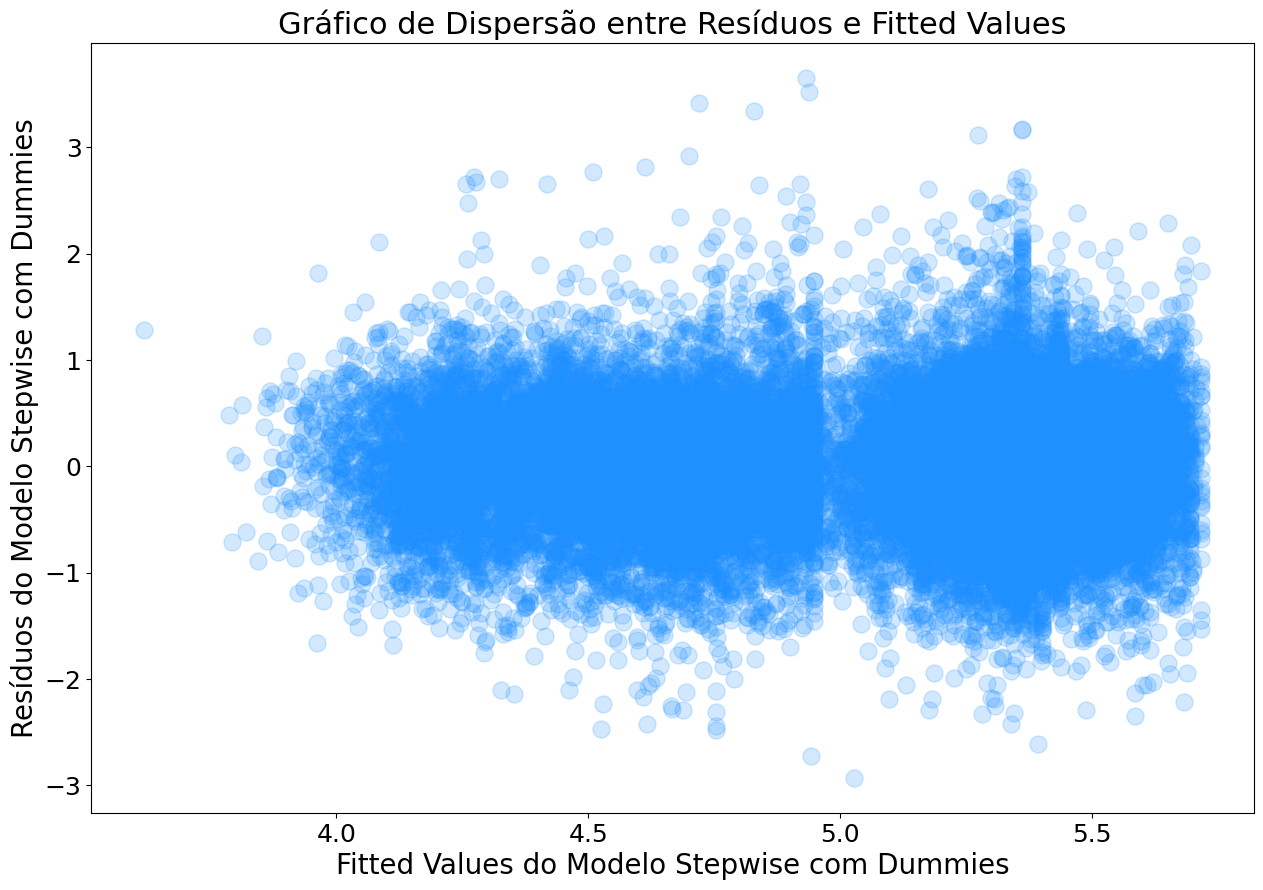

In [19]:
# Gráfico que relaciona resíduos e fitted values do
# 'modelo_saeb_dummies_uf_step'

plt.figure(figsize=(15,10))
sns.regplot(x='fitted_step', y='residuos_step', data=df_saeb_rend,
            marker='o', fit_reg=False,
            scatter_kws={"color":'dodgerblue', 'alpha':0.2, 's':150})
plt.title('Gráfico de Dispersão entre Resíduos e Fitted Values', fontsize=22)
plt.xlabel('Fitted Values do Modelo Stepwise com Dummies', fontsize=20)
plt.ylabel('Resíduos do Modelo Stepwise com Dummies', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

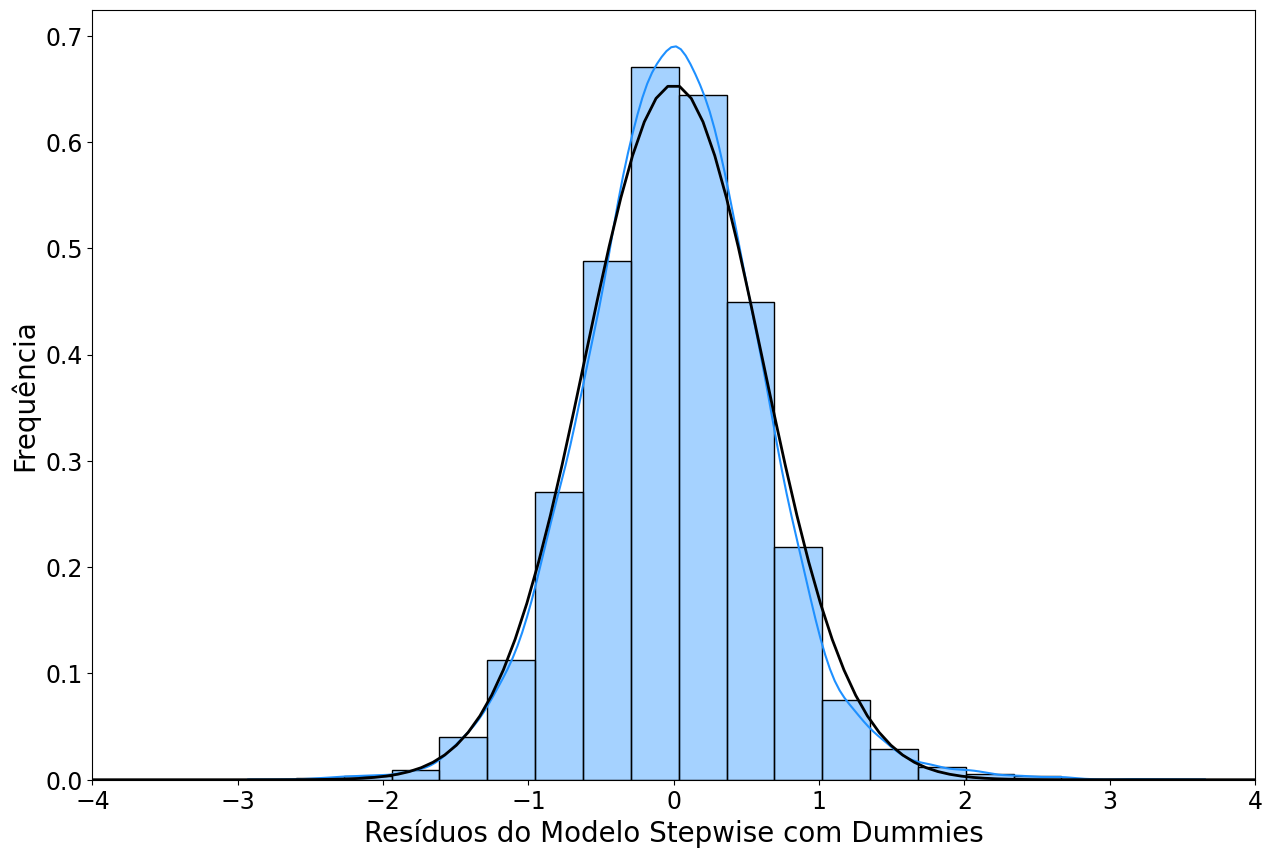

In [20]:
# Histograma dos resíduos do 'modelo_saeb_dummies_uf_step' com curva
# normal teórica para comparação das distribuições
# Kernel density estimation (KDE) - forma não-paramétrica para estimação da
# função densidade de probabilidade de determinada variável

from scipy.stats import norm

# Calcula os valores de ajuste da distribuição normal
(mu, sigma) = norm.fit(modelo_saeb_dummies_uf_step.resid)

# Gráfico propriamente dito
plt.figure(figsize=(15,10))
sns.histplot(modelo_saeb_dummies_uf_step.resid, bins=20, kde=True,
             stat="density", color='dodgerblue', alpha=0.4)
plt.xlim(-4, 4)
x = np.linspace(-4, 4, 100)
p = norm.pdf(x, mu, sigma)
plt.plot(x, p, 'k', linewidth=2)
plt.xlabel('Resíduos do Modelo Stepwise com Dummies', fontsize=20)
plt.ylabel('Frequência', fontsize=20)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.show()

<Figure size 1500x1000 with 0 Axes>

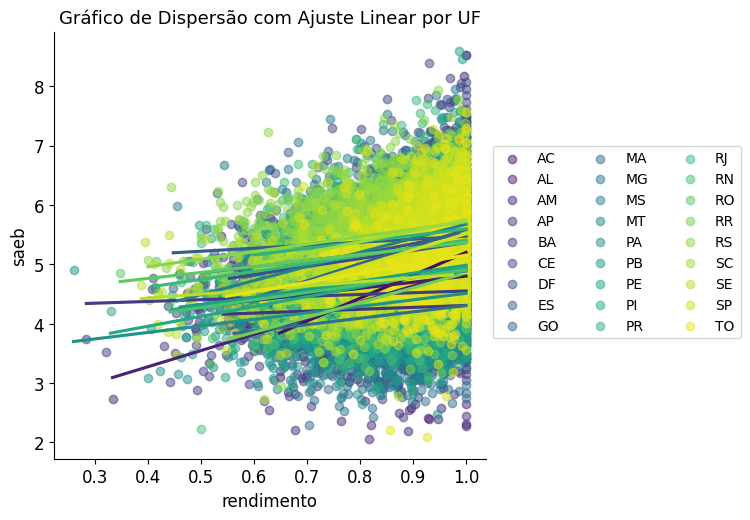

In [21]:
# Plotando a variável 'saeb' em função de 'rendimento', com destaque
# para as unidades federativas e fits lineares - Gráfico pela função 'lmplot' do
# pacote 'seaborn', com estratificação de 'uf' pelo argumento 'hue'

uf_order = df_saeb_rend['uf'].value_counts().index.sort_values()

plt.figure(figsize=(15, 10))
sns.lmplot(x='rendimento', y='saeb', data=df_saeb_rend,
           hue='uf', ci=None, palette='viridis', legend=False,
           scatter_kws={'alpha': 0.5},
           hue_order=uf_order)
plt.title('Gráfico de Dispersão com Ajuste Linear por UF', fontsize=13)
plt.xlabel('rendimento', fontsize=12)
plt.ylabel('saeb', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=10, ncol=3, bbox_to_anchor=(1, 0.75))
plt.show()